In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
insurance = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/insurance.csv?raw=True')

In [57]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [59]:
insurance.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

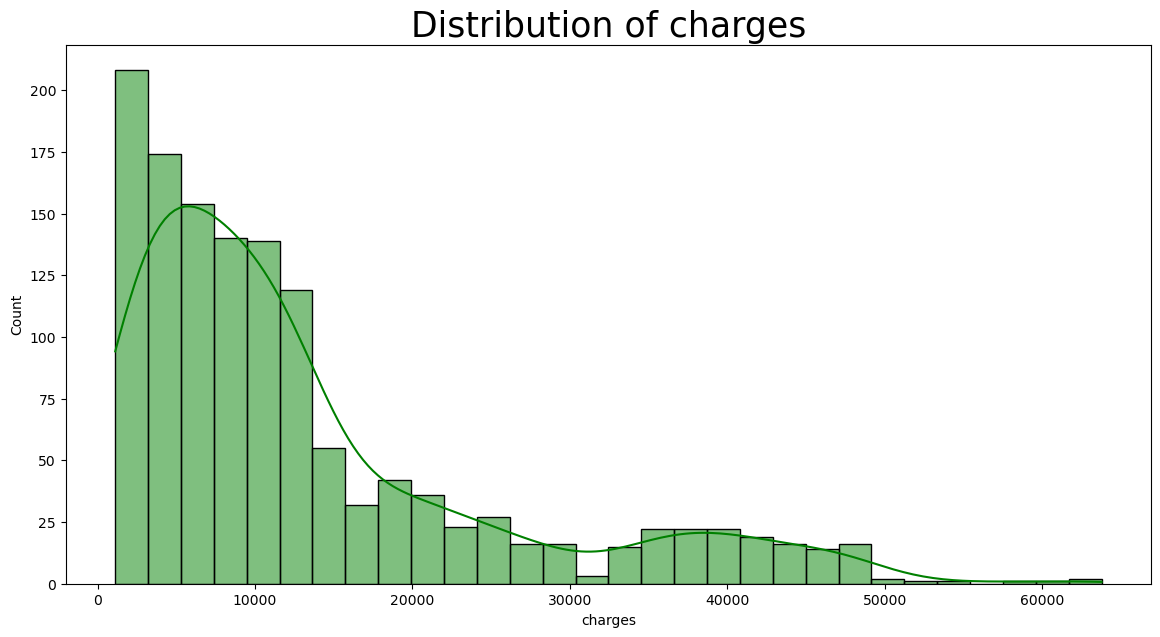

In [60]:
plt.figure(figsize = (14,7))
sns.histplot(data = insurance,x='charges',color='green',kde=True)
plt.title('Distribution of charges',size=25)
plt.show()

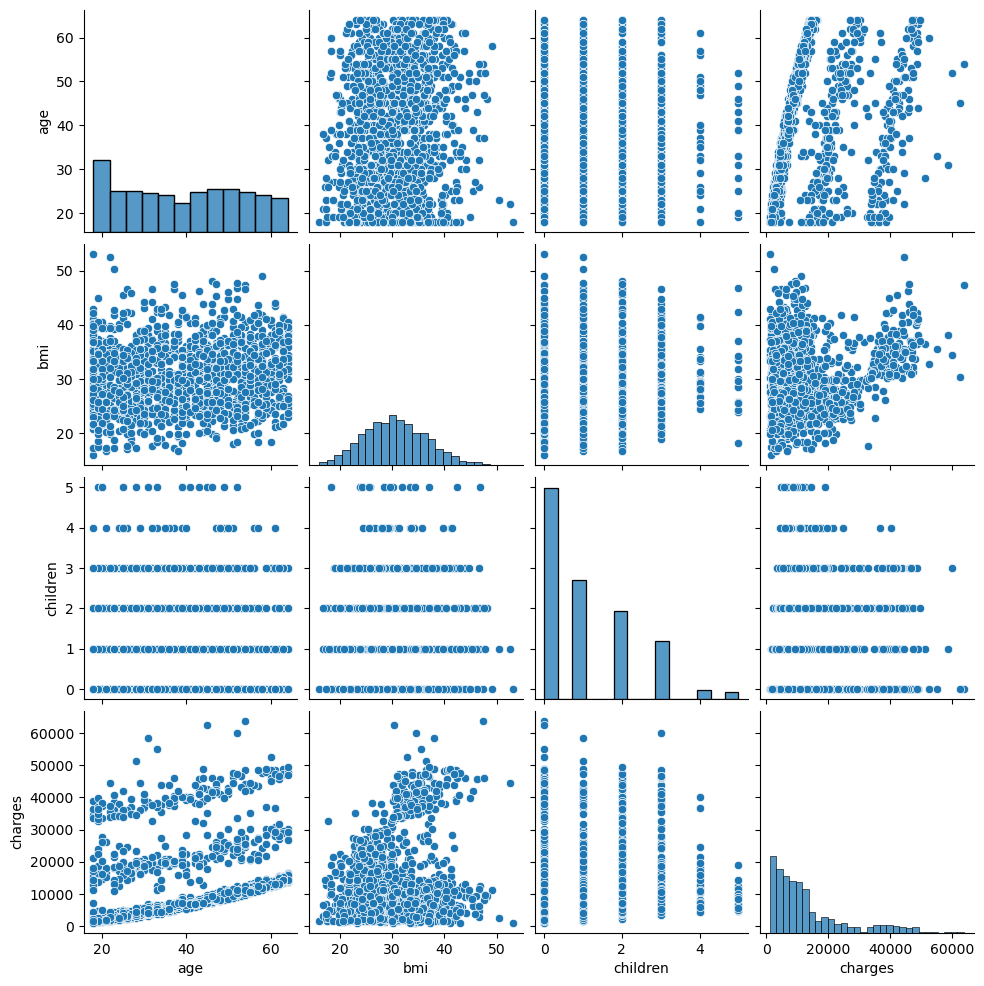

In [61]:
sns.pairplot(insurance)

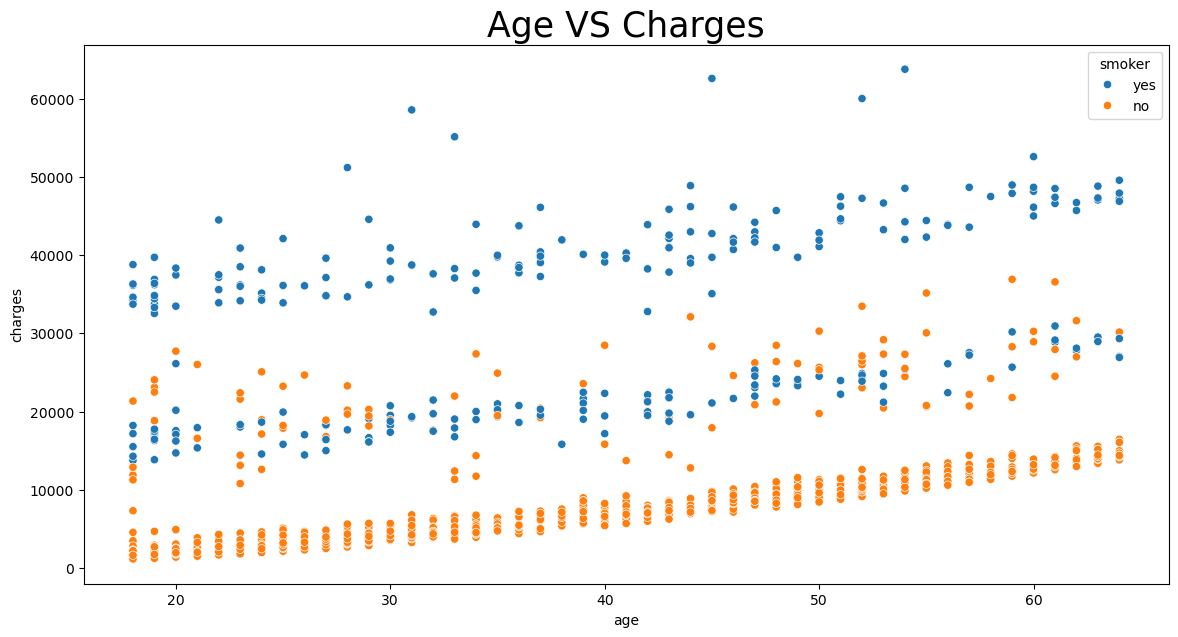

In [62]:
plt.figure(figsize = (14,7))
sns.scatterplot(data = insurance,x='age',y='charges',color='green',hue='smoker')
plt.title('Age VS Charges',size=25)
plt.show()

In [63]:
insurance_corr = insurance.corr(numeric_only=True)

In [64]:
insurance_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


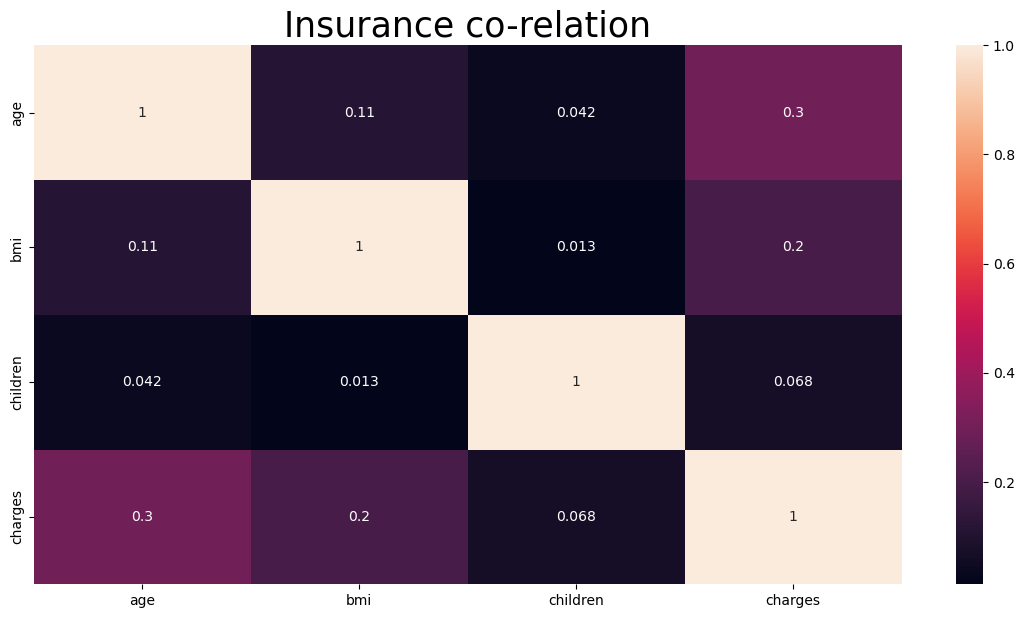

In [65]:
plt.figure(figsize=(14,7))
sns.heatmap(data=insurance_corr,annot=True)
plt.title('Insurance co-relation',size=25)
plt.show()

In [66]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
# lable encoding and one hot encoding

In [68]:
# low     0 
# medium  1
# high    2
# lable encoding give value like1,2,3,4(IT IS FOR RANKING)

In [69]:
# one Hot encoding
# blue
# green 
# red

In [70]:
# blue red green
# 0     0     1
# 0     0     1

In [71]:
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()

In [72]:
label_encode.fit(insurance['gender'])#fit data automatically / save

LabelEncoder()

In [73]:
# transform data
insurance['gender'] = label_encode.transform(insurance['gender'])

In [74]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [75]:
label_encode.fit(insurance['smoker'])

LabelEncoder()

In [76]:
insurance['smoker'] = label_encode.transform(insurance['smoker'])

In [77]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [78]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [79]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

In [80]:
insurance[['region']].head()

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest


In [81]:
one_hot_encoder.fit(insurance[['region']])

OneHotEncoder()

In [82]:
region_encoded = one_hot_encoder.transform(insurance[['region']]).toarray()#toarray is for coverting data into array or matrix

In [83]:
region_encoded

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [84]:
#give a column name (categories_)
one_hot_encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [85]:
temp = pd.DataFrame(region_encoded,
                    columns=['northeast','northwest','southeast','southwest']
                   ,dtype='int')

In [86]:
temp.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [87]:
insurance = pd.concat([insurance,temp],axis=1)#merging of data

In [88]:
insurance.drop('region',axis=1,inplace=True)

In [89]:
insurance.head()

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [90]:
X = insurance.drop('charges',axis=1)
Y = insurance['charges'] 

In [91]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [92]:
X_train

,age,gender,bmi,children,smoker,northeast,northwest,southeast,southwest
804,23,1,26.510,0,0,0,0,1,0
354,18,0,38.280,0,0,0,0,1,0
563,50,1,44.770,1,0,0,0,1,0
1177,40,0,27.400,1,0,0,0,0,1
390,48,1,35.625,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
575,58,0,27.170,0,0,0,1,0,0
973,19,0,40.500,0,0,0,0,0,1
75,57,1,34.010,0,0,0,1,0,0
599,52,0,37.525,2,0,0,1,0,0


In [93]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [94]:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [95]:
predictions = linear_model.predict(X_test)

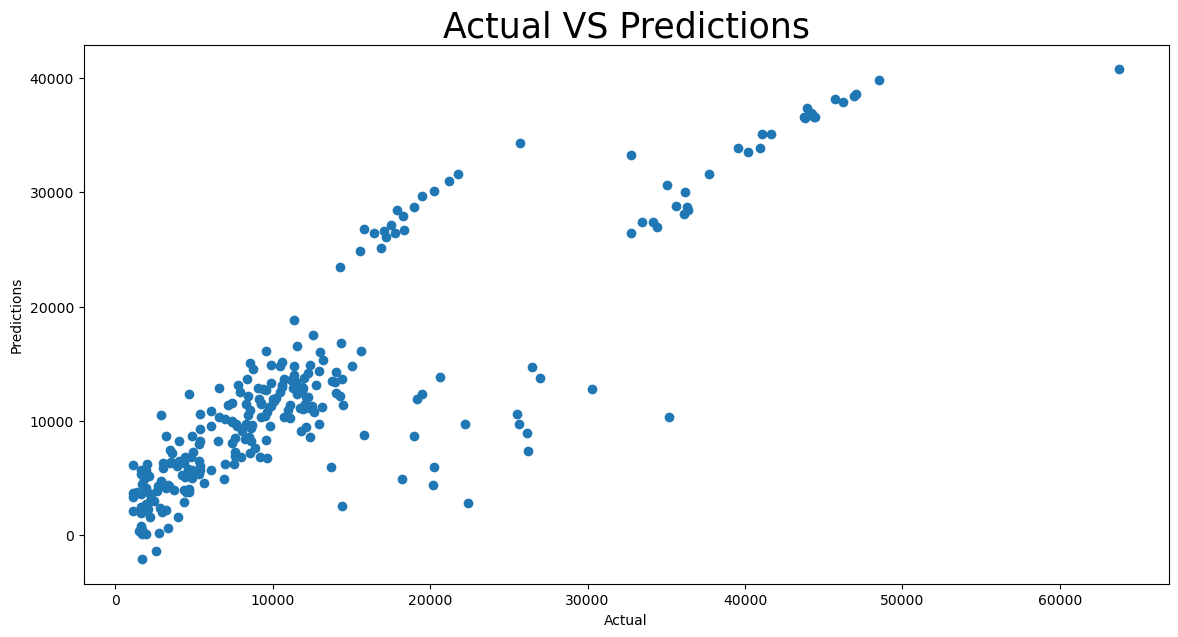

In [96]:
plt.figure(figsize=(14,7))
plt.scatter(Y_test,predictions)
plt.title('Actual VS Predictions',size=25)
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(mean_absolute_error(Y_test,predictions))
print(mean_squared_error(Y_test,predictions))
print(np.sqrt(mean_absolute_error(Y_test,predictions)))
print(r2_score(Y_test,predictions))

4036.874028358431
33748393.37059587
63.53639923979349
0.7608371101323961
